In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv("Salary_Data.csv")

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


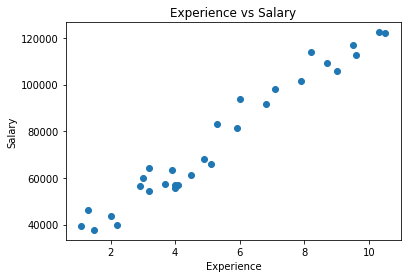

In [5]:
plt.scatter(data.iloc[:,0],data.iloc[:,1])
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Experience vs Salary")
plt.show()

## to compute the cost function J(Θ)

In [15]:
def computeCost(X,y,theta):
    """
    Take in a numpy array X,y, theta and generate the cost function of using theta as parameter in a linear regression model
    """
    m=len(y)
    predictions=X.dot(theta)
    square_err=(predictions - y)**2
    
    return 1/(2*m) * np.sum(square_err)

## Initialize X,y and compute the cost of using Θ = (0,0)

In [16]:
data_n=data.values
m=len(data_n[:,-1])
X=np.append(np.ones((m,1)),data_n[:,0].reshape(m,1),axis=1)
y=data_n[:,1].reshape(m,1)
theta=np.zeros((2,1))
computeCost(X,y,theta)

3251477635.366667

## Now to implement gradient descent to optimize Θ, by minimizing the cost function J(Θ)

In [17]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking   num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each  iteration
    """
    
    m=len(y)
    J_history=[]
    
    for i in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(),(predictions -y))
        descent=alpha * 1/m * error
        theta-=descent
        J_history.append(computeCost(X,y,theta))
    
    return theta, J_history
theta,J_history = gradientDescent(X,y,theta,0.01,1500)
print("h(x) = "+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1")

h(x) = 24796.02 + 9597.79x1


### which shows the optimized Θ values rounded off to 2 decimal places
## To make this more complete, Iet's try to visualize the cost function for a standard univariate case

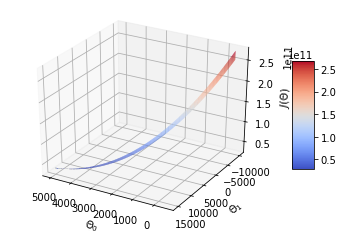

In [19]:
from mpl_toolkits.mplot3d import Axes3D
#Generating values for theta0, theta1 and the resulting cost value
theta0_vals=np.linspace(-500,5000,100)
theta1_vals=np.linspace(-10000,15000,100)
J_vals=np.zeros((len(theta0_vals),len(theta1_vals)))
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t=np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i,j]=computeCost(X,y,t)
#Generating the surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
#rotate for better angle
ax.view_init(30,120)

### the cost function is a convex function which only has 1 global minimum, hence, gradient descent would always result in finding the global minimum

Text(0.5, 1.0, 'Cost function using Gradient Descent')

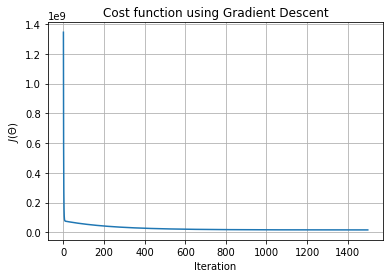

In [20]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.grid()
plt.title("Cost function using Gradient Descent")

### Indicating that the gradient descent implementation works in reducing the cost function

### Now with that optimized Θ values, plot the graph together with the predicted values (the line of best fit)

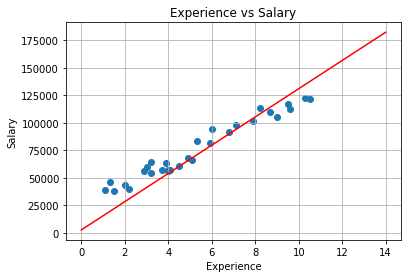

In [13]:
plt.scatter(data.iloc[:,0],data.iloc[:,1])
x_value=[x for x in range(15)]
y_value=[y*theta[1]+theta[0] for y in x_value]
plt.plot(x_value,y_value,color="r")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Experience vs Salary")
plt.grid()
plt.show()

In [18]:
24796.02 + 9597.79*15

168762.87